In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import keras
from sklearn import preprocessing
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Input

Using TensorFlow backend.


In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
cats = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
data_frame = fetch_20newsgroups(subset='all',shuffle=True, categories=cats)
sentences=data_frame.data
y=data_frame.target

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [6]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data_frame.data)
X = tokenizer.texts_to_sequences(data_frame.data)
X = pad_sequences(X)

In [7]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data_frame.target)
y = to_categorical(integer_encoded)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1556, 6819), (389, 6819), (1556, 2), (389, 2))

In [9]:
embed_dim = 128
lstm_out = 196

In [10]:
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [11]:
accuracy_val=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1556 samples, validate on 389 samples
Epoch 1/5
1556/1556 [==============================] - 901s 579ms/step - loss: 0.6824 - accuracy: 0.5662 - val_loss: 0.6436 - val_accuracy: 0.6915
Epoch 2/5
1556/1556 [==============================] - 903s 580ms/step - loss: 0.5824 - accuracy: 0.7699 - val_loss: 0.5531 - val_accuracy: 0.7378
Epoch 3/5
1556/1556 [==============================] - 908s 583ms/step - loss: 0.4089 - accuracy: 0.8438 - val_loss: 0.5395 - val_accuracy: 0.7147
Epoch 4/5
1556/1556 [==============================] - 910s 585ms/step - loss: 0.2787 - accuracy: 0.9062 - val_loss: 0.5568 - val_accuracy: 0.8046
Epoch 5/5
1556/1556 [==============================] - 910s 585ms/step - loss: 0.1640 - accuracy: 0.9447 - val_loss: 0.5615 - val_accuracy: 0.7789


In [12]:
from keras.layers import Embedding, Flatten

In [13]:
print(accuracy_val.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [14]:
import matplotlib.pyplot as plt

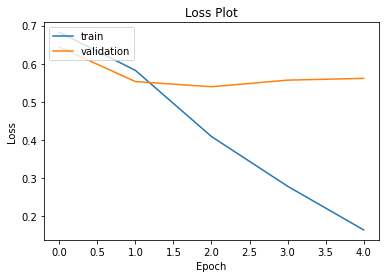

In [15]:
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

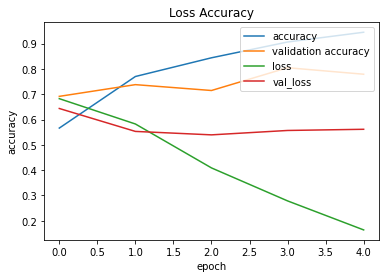

In [16]:
plt.plot(accuracy_val.history['accuracy'])
plt.plot(accuracy_val.history['val_accuracy'])
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [19]:
# Using Early Stopping to hadle Overfitting

from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
accuracy_val_early_stop = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test,y_test), callbacks=[es])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1556 samples, validate on 389 samples
Epoch 1/10
1556/1556 [==============================] - 751s 483ms/step - loss: 0.6885 - accuracy: 0.5540 - val_loss: 0.6720 - val_accuracy: 0.6607
Epoch 2/10
1556/1556 [==============================] - 760s 488ms/step - loss: 0.6062 - accuracy: 0.7494 - val_loss: 0.5582 - val_accuracy: 0.7172
Epoch 3/10
1556/1556 [==============================] - 746s 480ms/step - loss: 0.5203 - accuracy: 0.7988 - val_loss: 0.5631 - val_accuracy: 0.7069
Epoch 00003: early stopping


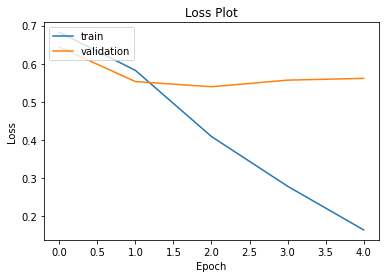

In [20]:
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

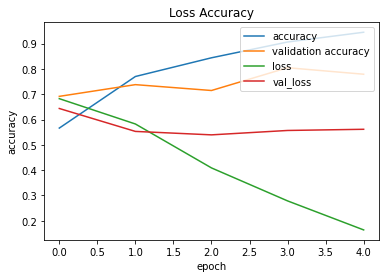

In [21]:
plt.plot(accuracy_val.history['accuracy'])
plt.plot(accuracy_val.history['val_accuracy'])
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()